In [4]:
import pandas as pd
import numpy as np

In [5]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')


In [6]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [8]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [9]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [17]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# divide trian_tes 
train_input, test_input, train_target, test_target = train_test_split(
    data,
    target,
    test_size = 0.2, # the size of test set is 20% of the entire data
    random_state = 42
)

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target) # train the logistic model based on the train_data

# under-fitting
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [21]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


### Decision Tree Model
It is easy to explain the reason for the result produced

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


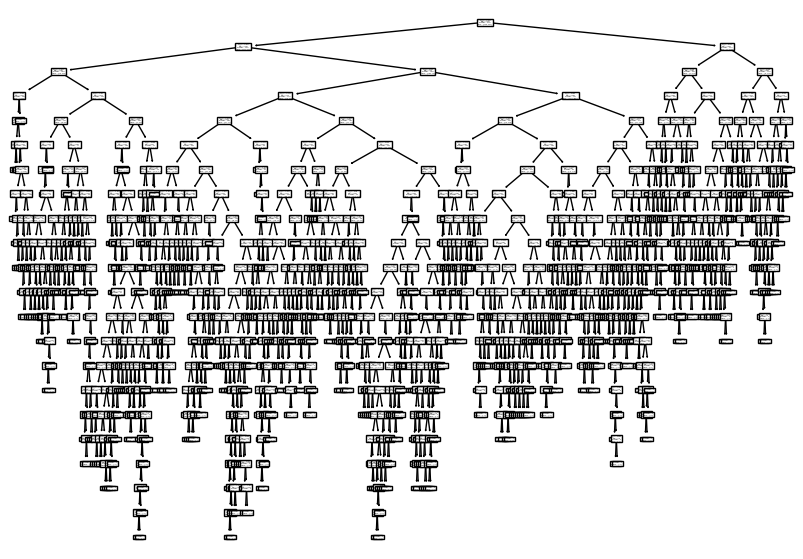

In [24]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize = (10, 7))
plot_tree(dt)
plt.show()

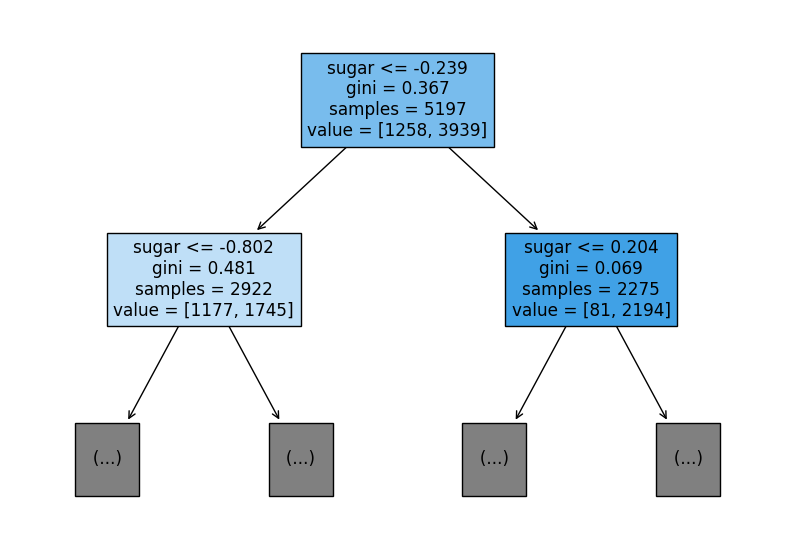

In [26]:
plt.figure(figsize = (10, 7))
plot_tree(
    dt,
    max_depth=1,
    filled=True,
    feature_names = [
        'alcohol',
        'sugar',
        'pH'
    ]
)
plt.show()

In [74]:
dt = DecisionTreeClassifier(
    max_depth=7
)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8895516644217818
0.8630769230769231


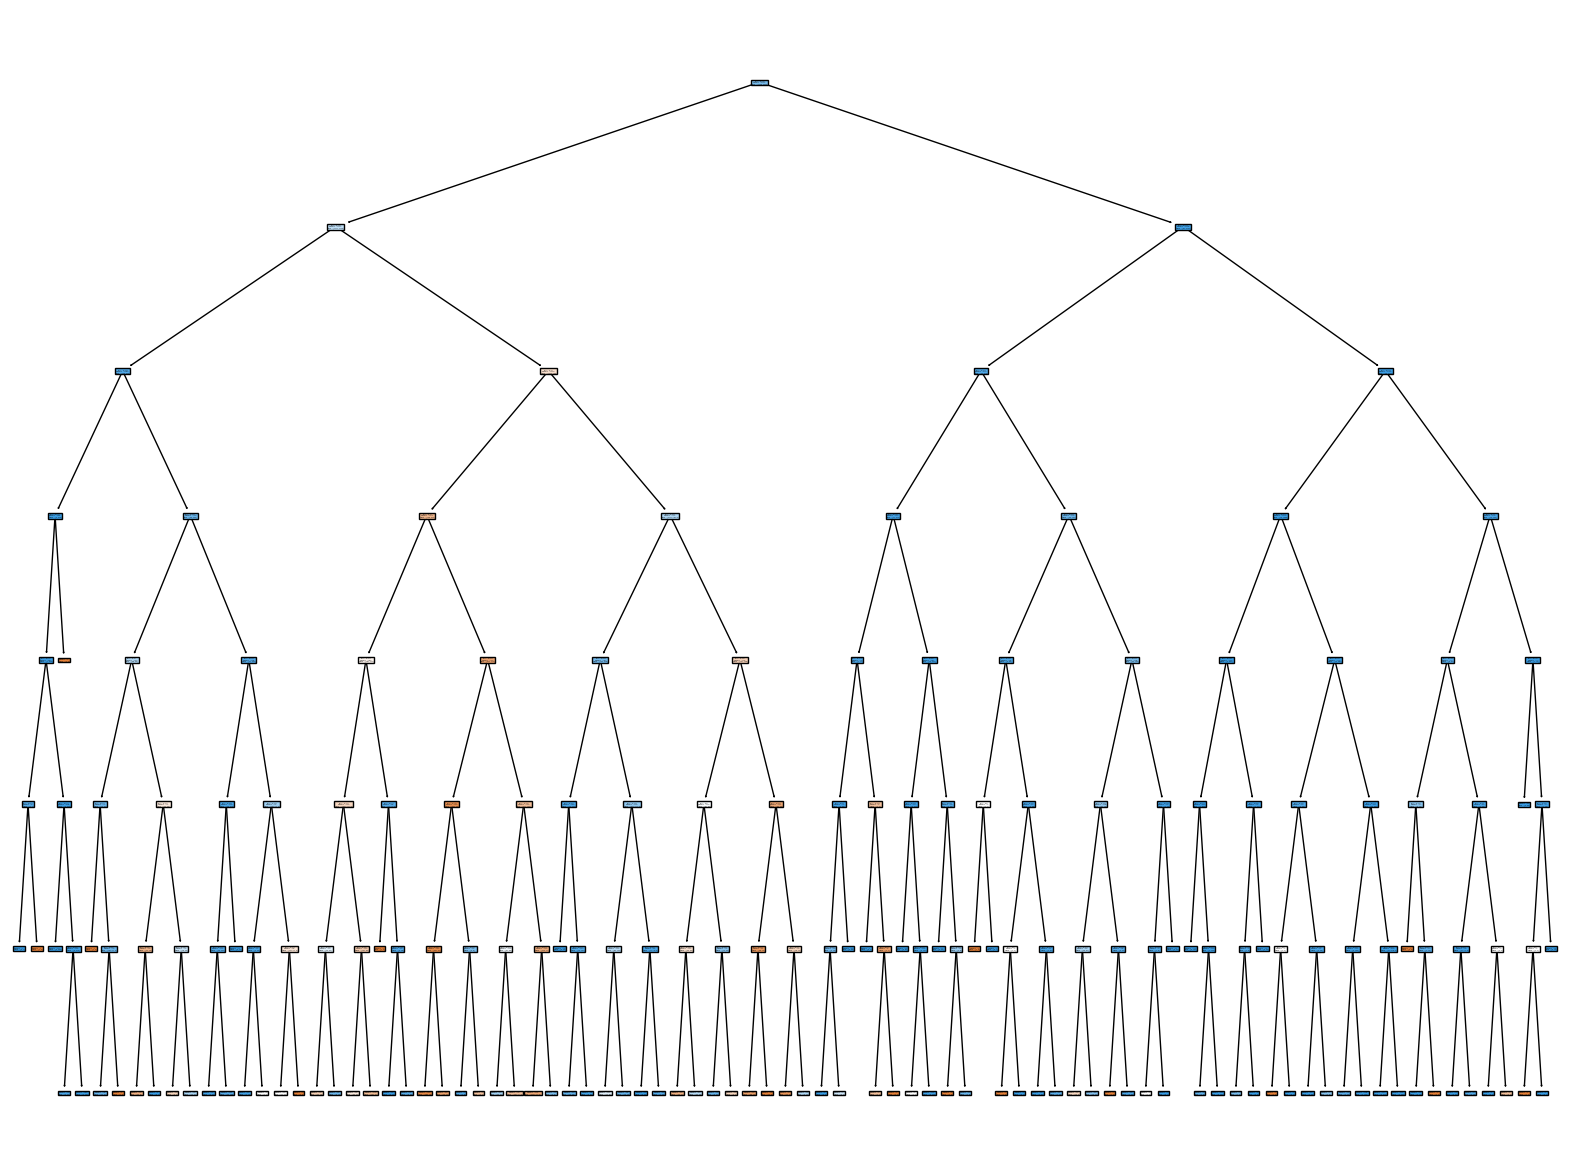

In [75]:
plt.figure(figsize=(20, 15))
plot_tree(
    dt,
    filled=True,
    feature_names=['alcohol','sugar','pH']
)
plt.show()

In [76]:
print(dt.feature_importances_)

[0.17016394 0.67355321 0.15628284]
